# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,,AU,,,,,,
1,broome,,AU,,,,,,
2,rikitea,,PF,,,,,,
3,butaritari,,KI,,,,,,
4,atuona,,PF,,,,,,
5,carnarvon,,AU,,,,,,
6,saint george,,BM,,,,,,
7,cherskiy,,RU,,,,,,
8,maria chiquita,,PA,,,,,,
9,hilo,,US,,,,,,


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
        
        count += 1
              
    except (KeyError,):
          print("City not found. Skipping....")
              
    if count == 51:
        count = 1
        count_set += 1
        time.sleep(60)
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 1 of Set 1 | Albany
Processing Record 2 of Set 1 | Broome
Processing Record 3 of Set 1 | Rikitea
Processing Record 4 of Set 1 | Butaritari
Processing Record 5 of Set 1 | Atuona
Processing Record 6 of Set 1 | Carnarvon
Processing Record 7 of Set 1 | Saint George
Processing Record 8 of Set 1 | Cherskiy
Processing Record 9 of Set 1 | Maria Chiquita
Processing Record 10 of Set 1 | Hilo
Processing Record 11 of Set 1 | Sorkjosen
Processing Record 12 of Set 1 | Port Elizabeth
Processing Record 13 of Set 1 | Port Alfred
Processing Record 14 of Set 1 | Ushuaia
City not found. Skipping....
Processing Record 15 of Set 1 | Dingle
Processing Record 16 of Set 1 | Mar del Plata
Processing Record 17 of Set 1 | Qaanaaq
Processing Record 18 of Set 1 | Kaitangata
Processing Record 19 of Set 1 | Jamestown
Processing Record 20 of Set 1 | Busselton
Processing Record 21 of Set 1 | Salalah
Processing Record 22 of Set 1 | Umm Lajj
Processing Re

Processing Record 33 of Set 4 | Deep River
Processing Record 34 of Set 4 | Vao
Processing Record 35 of Set 4 | Balurghat
Processing Record 36 of Set 4 | Chapais
Processing Record 37 of Set 4 | Juneau
Processing Record 38 of Set 4 | Port Lincoln
Processing Record 39 of Set 4 | Chokurdakh
Processing Record 40 of Set 4 | Castro Alves
Processing Record 41 of Set 4 | Rosarito
Processing Record 42 of Set 4 | Jardim
Processing Record 43 of Set 4 | Andahuaylas
Processing Record 44 of Set 4 | Petropavl
Processing Record 45 of Set 4 | Praia
Processing Record 46 of Set 4 | Komsomolskiy
Processing Record 47 of Set 4 | Jiuquan
Processing Record 48 of Set 4 | Laje
Processing Record 49 of Set 4 | Amga
Processing Record 50 of Set 4 | Norman Wells
City not found. Skipping....
Processing Record 1 of Set 5 | Huarmey
Processing Record 2 of Set 5 | Uvat
City not found. Skipping....
Processing Record 3 of Set 5 | Presidente Medici
Processing Record 4 of Set 5 | Kot Samaba
Processing Record 5 of Set 5 | Alof

Processing Record 19 of Set 8 | Sabha
Processing Record 20 of Set 8 | Porto Walter
Processing Record 21 of Set 8 | Kupino
Processing Record 22 of Set 8 | Yuzhnyy
City not found. Skipping....
Processing Record 23 of Set 8 | Maceio
Processing Record 24 of Set 8 | Nouakchott
Processing Record 25 of Set 8 | Pochutla
Processing Record 26 of Set 8 | Laurel
Processing Record 27 of Set 8 | San Patricio
Processing Record 28 of Set 8 | Okahandja
Processing Record 29 of Set 8 | Leningradskiy
Processing Record 30 of Set 8 | Arrondissement de Melun
Processing Record 31 of Set 8 | Touros
Processing Record 32 of Set 8 | Mehamn
Processing Record 33 of Set 8 | Meulaboh
Processing Record 34 of Set 8 | Amapa
Processing Record 35 of Set 8 | Saint-Joseph
City not found. Skipping....
City not found. Skipping....
Processing Record 36 of Set 8 | Solnechnyy
Processing Record 37 of Set 8 | Naantali
Processing Record 38 of Set 8 | Caravelas
Processing Record 39 of Set 8 | Ridgecrest
Processing Record 40 of Set 8

Processing Record 46 of Set 11 | Kindu
Processing Record 47 of Set 11 | Kon Tum
Processing Record 48 of Set 11 | Vestmannaeyjar
Processing Record 49 of Set 11 | Ingham
Processing Record 50 of Set 11 | Sedro-Woolley
Processing Record 1 of Set 12 | Batabano
Processing Record 2 of Set 12 | Westport
City not found. Skipping....
Processing Record 3 of Set 12 | Nyanguge
Processing Record 4 of Set 12 | Inhambane
------------------------
 Data Retrieval Complete 
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [7]:
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75,AU,1580358347,93,-35.02,117.89,59.00,12.75
1,broome,40,AU,1580358457,63,-17.97,122.23,91.40,13.87
2,rikitea,100,PF,1580358606,78,-23.12,-134.97,78.46,14.7
3,butaritari,80,KI,1580358606,73,3.07,172.79,85.08,7.85
4,atuona,2,PF,1580358607,79,-9.8,-139.03,80.71,14.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

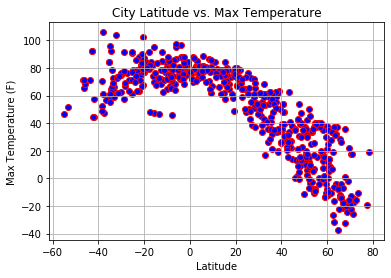

In [9]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

## Lat Vs Temp

The plot above is trying to establish a relationship between a city's latitude and the temperature of the area.

#### Latitude vs. Humidity Plot

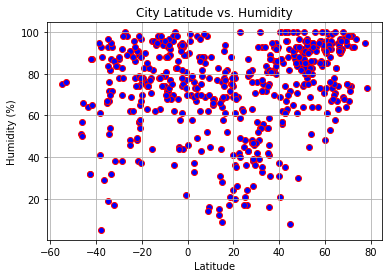

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

## Lat vs Humidity
This plot tries to establish a relationship between latitude and humidity of a city.

#### Latitude vs. Cloudiness Plot

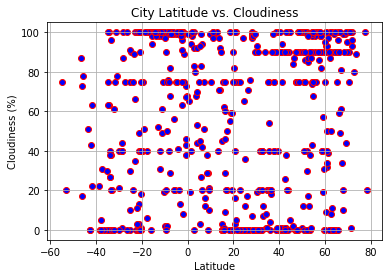

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

## Latitude vs cloudiness
Trying to establish a relationship between Latitude and cloudiness of a city.

#### Latitude vs. Wind Speed Plot

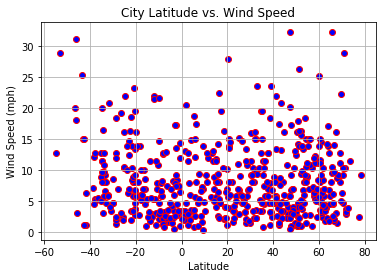

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Lat vs Wind speed
How is wind speed affected by latitude of a city?

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,albany,75,AU,1580358347,93,-35.02,117.89,59.00,12.75,Southern Hemisphere
1,broome,40,AU,1580358457,63,-17.97,122.23,91.40,13.87,Southern Hemisphere
2,rikitea,100,PF,1580358606,78,-23.12,-134.97,78.46,14.7,Southern Hemisphere
3,butaritari,80,KI,1580358606,73,3.07,172.79,85.08,7.85,Nothern Hemisphere
4,atuona,2,PF,1580358607,79,-9.8,-139.03,80.71,14.7,Southern Hemisphere


In [14]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
3,butaritari,80,KI,1580358606,73,3.07,172.79,85.08,7.85,Nothern Hemisphere
6,saint george,40,BM,1580358340,72,32.38,-64.68,61.00,14.99,Nothern Hemisphere
7,cherskiy,99,RU,1580358607,97,68.75,161.3,-24.21,9.06,Nothern Hemisphere
8,maria chiquita,21,PA,1580358607,78,9.44,-79.76,80.60,6.93,Nothern Hemisphere
9,hilo,90,US,1580358607,69,19.73,-155.09,77.00,6.93,Nothern Hemisphere


In [15]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,albany,75,AU,1580358347,93,-35.02,117.89,59.00,12.75,Southern Hemisphere
1,broome,40,AU,1580358457,63,-17.97,122.23,91.40,13.87,Southern Hemisphere
2,rikitea,100,PF,1580358606,78,-23.12,-134.97,78.46,14.7,Southern Hemisphere
4,atuona,2,PF,1580358607,79,-9.8,-139.03,80.71,14.7,Southern Hemisphere
5,carnarvon,90,AU,1580358607,69,-24.87,113.63,78.80,21.92,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.886124059322151


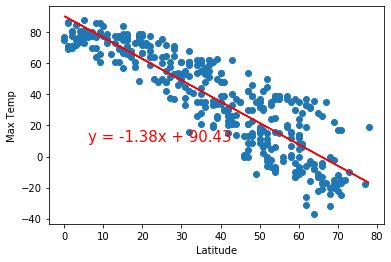

In [16]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Max Temp vs Lat.png')
plt.show()

## Nothern Hem Max Temp Vs Lat
No relationship can be established between temperature and latitude of the cities in the nothern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3306706909965599


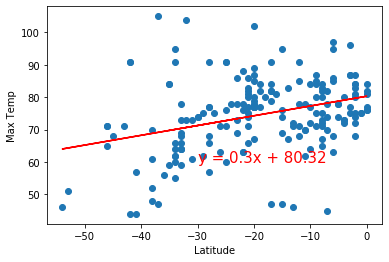

In [17]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Max Temp vs Lat.png')
plt.show()

## Sothern Hem Temp vs Lat
There is a very weak relationship established between the max temp and latitude in the southern hemisphere.
However we cannot fully rely on this data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4089538252462631


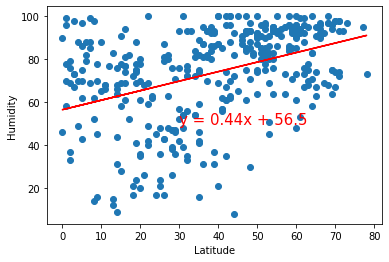

In [18]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Humidity(%) vs Lat.png')
plt.show()

## Nothern Hemisphere Humidity vs Lat
The relationship established between the nothern hemisphere's humidity vs latitude is too weak to be relied on.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24407190855983663


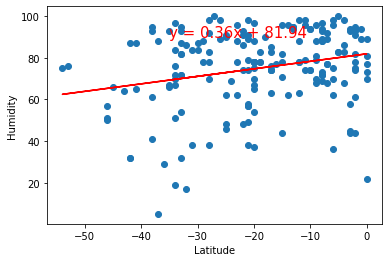

In [19]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Humidity(%) vs Lat.png')
plt.show()

## Southern Hemisphere Humidity vs Lat
No relationship can be established.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17760751031130348


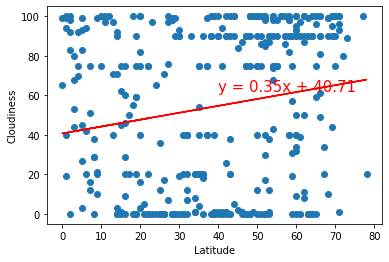

In [20]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Cloudiness(%) vs Lat.png')
plt.show()

## Nothern hemisphere cloudiness vs lat
A weak relationship can be established between cloudiness in the nothern hemisphere and the latitude although this is not totally reliable.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.37202910138647954


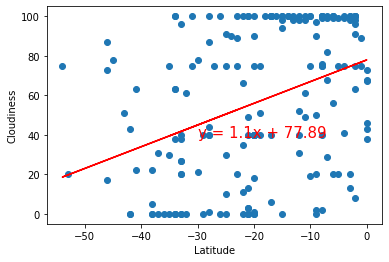

In [21]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Cloudiness (%) vs Lat.png')
plt.show()

## Southern Hemisphere cloudiness vs lat
no relationship established between the cloudiness and the latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.061858173361927726


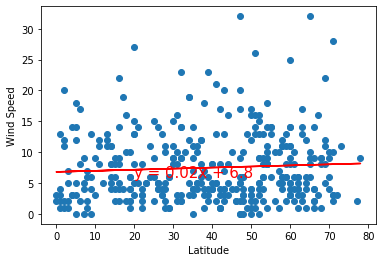

In [22]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

## Nothern Hemisphere wind speed vs latitude
no relationship established between the wind speed and the latitude in the nothern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.32734129405562207


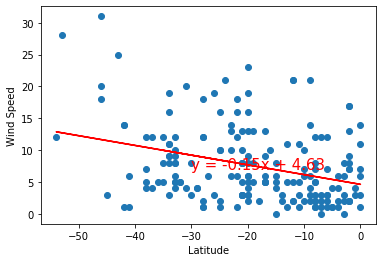

In [23]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

## Southern hemisphere wind speed vs lat
Absolutely no relationship established between the wind speed and the latitude in the southern hemisphere.

# Analysis

No relationship can be established between latitude and the wind speed analyzed in this project. The relationships are too weak to give a clear indication of a trend.

Looking at the humidity and latitude of the nothern hemisphere, we can see a relationship almost being formed but it is too weak.

The humidity in the southern hemisphere shows it becoming more humid as you go up the latitude.